Author: Sean Tulin
<br>
Date: Jan. 9, 2023
<br>
PHYS 2030 W23

# <center><font color=#46769B>Lesson 1: Introduction to Monte Carlo sampling</font></center>

## <font color=#46769B>Introduction:</font>
The first section of this course will deal with __Monte Carlo methods__. Monte Carlo methods are a tool that uses *random sampling* to compute quantities where analytic methods may be very complicated or impossible. (It is named after the famous casino in Monaco.) This is not a course on probabilities and statistics. However, we will borrow many concepts from these topics.

Our goals for this lesson are:
- Introduce basic theory, definitions, and examples of Monte Carlo sampling
- Introduce the __probability distribution function__ (PDF).
- Learn some basics of using `numpy` and `matplotlib.pyplot`
- Learn how to sample from Bernoulli and uniform distributions using `numpy`

You should generally be familiar with the [basics of numpy](https://numpy.org/doc/stable/user/absolute_beginners.html).

The following cell imports the `numpy` and `matplotlib.pyplot` libraries which are used in this notebook. You must run it first if you wish to evaluate any of the code contained below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## <font color=#46769B>Basic definitions:</font>

This is not a course on statistics. However, statistics and Monte Carlo sampling share many basic concepts. We will introduce some basic concepts here, and then we will discuss what is the difference between these topics.

First, let's give some definitions. Suppose we have a list of $N$ values for some quantity $x$<font color=red>$^1$</font>

$$x_0, \; x_1, \; x_2, \; ... \;, \; x_{N-1} \; .$$

The __mean value__ (or average value) of $x$ is

$$\langle x \rangle = \frac{1}{N} \sum_{i=0}^{N-1} x_i \, .$$

Here, the angle bracket notation means take the average value of whatever appears within. For example, the mean value of $x^2$ is

$$\langle x^2 \rangle = \frac{1}{N} \sum_{i=0}^{N-1} x_i^2 \, .$$

More generally, given an arbitrary function $f(x)$, its mean value is

$$\langle f(x) \rangle = \frac{1}{N} \sum_{i=0}^{N-1} f(x_i) \, .$$

The __variance__ of $x$ is<font color=red>$^2$</font>

$$\Delta x^2 = \frac{1}{N} \sum_{i=0}^{N-1} \left(x_i - \langle x \rangle \right)^2 = \langle x^2 \rangle - \langle x \rangle^2\, .$$

One can show that the middle and right-hand expressions are equal to each other, so this equation gives two identical ways to compute $\Delta x^2$.
The variance represents how spread out the values of $x$ are from the mean. If the values of $x_i$ are widely spread out from their mean value, then the variance is large.
Conversely, if all values of $x_i$ are identical, then $x_i = \langle x \rangle$ for each $i$, and the variance is zero, $\Delta x^2 = 0$.

The __standard deviation__, denoted $\Delta x$, is the square root of the variance and is another way to quantify how spread out values of $x_i$ are from the mean. 
It is defined by

$$\Delta x = \sqrt{\Delta x^2} = \sqrt{ \frac{1}{N} \sum_{i=0}^{N-1} \left(x_i - \langle x \rangle \right)^2 } \, .$$

To calculate the standard deviation, you *always calculate the variance and take the square root*.
You might be tempted to say

$$\Delta x =  \frac{1}{N} \sum_{i=0}^{N-1} \left(x_i - \langle x \rangle \right) \, , \qquad {\rm (wrong)}$$

but you can show that this (wrong) definition gives $\langle x \rangle - \langle x \rangle = 0$.

The last important definition is the __standard error of the mean__ (sometimes called __error of the mean__ or confusingly the __standard deviation of the mean__).
There is not a standard notation for this important quantity. 
In this course, we will denote it by $E_x$ and it is defined as

$$E_x = \frac{\Delta x}{\sqrt N} \, .$$

That is, we calculate the standard deviation and divide by $\sqrt{N}$.

### <font color=#46769B>Footnotes:</font>

<font color=red>$^1$</font> Note since Python counting starts at zero, I will follow the same numbering conventions thoughout.

<font color=red>$^2$</font> In *statistics*, it is sometimes advocated that the $\frac{1}{N}$ factor should be replaced with $\frac{1}{N-1}$, which is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). 
This correction is especially important when $N$ is small, i.e., you have a small number of $x$ values to work with.
In *Monte Carlo sampling*, this correction is irrelevant because we are free to take $N$ to be arbitrarily large and so $N-1 \approx N$.

### <font color=#46769B>Helpful functions in numpy</font>

The `numpy` package will be ubiquitous in this course, as it has many useful functions already built-in. 
There is no need to reinvent the wheel! (Sometimes it is useful to make your own version as a learning exercise to test your understanding.)

Let's illustrate how to calculate all of the above definitions using `numpy`. 
Feel free to change and modify the code below.

In [2]:
# Define a list of numbers
x = [1,3,0,4,1,5,9]

# Define N
N = len(x)

# Mean value
mean = np.mean(x)

# Variance
var = np.var(x)

# Standard deviation
stddev = np.std(x)

# Error on the mean
Ex = stddev/np.sqrt(N)

# Print the results
print("Mean is", mean)
print("Variance is", var)
print("Standard deviation is", stddev, "or", np.sqrt(var))
print("Standard error on the mean is", Ex)

Mean is 3.2857142857142856
Variance is 8.204081632653061
Standard deviation is 2.864276807966203 or 2.864276807966203
Standard error on the mean is 1.0825948742754974


## <font color=#46769B>Statistics vs Sampling</font>

Let's discuss a few examples, which will illustrate the meaning of the definitions given above. 
Then, we discuss how the theory of __Monte Carlo sampling__ is distinct from the broader theory of statistics.

### <font color=#46769B>Example 1: Measuring the gravitational acceleration constant</font>

Suppose we perform a physics experiment to measure the gravitational acceleration constant $g$. The accepted value is $g=9.81 \; {\rm m/s^2}$.
Let's denote $x$ as the value for $g$ measured in our experiment. Now, in any respectable experiment, we perform the experiment many times ($N$ times). So we have many values for $x$, i.e., $x_0, x_1, x_2, ...$. For example, we might measure $N=10$ values

$$10.01, \; 9.78, \; 9.93, \; 9.88, \; 9.90, \; 9.68 , \; 9.85 , \; 9.75, \; 9.66 , \; 10.10 .$$

The mean value $\langle x \rangle$ represents our best guess for the true value of $x$ (assuming we have equal confidence in each iteration of our experiment). In this case, $\langle x \rangle = 9.85$.

In any experiment, it is meaningless to quote the mean by itself without also the uncertainty. The uncertainty is given by the standard error of the mean, $E_x$. Here, the standard deviation is $\Delta x = 0.13$, so the uncertainty is

$$E_x = \frac{\Delta x}{\sqrt{N}} = 0.04 \; .$$

So, the result of your experiment is $x = 9.85 \pm 0.04$.

What is the difference between the standard deviation and the standard error on the mean?
- The *standard deviation* represents the spread in our values of $x_i$. That is, if we performed *one more measurement* of $x$, we would "likely" obtain a value somewhere between $\langle x\rangle - \Delta x = 9.72$ and $\langle x\rangle + \Delta x = 9.99$.
- The *error on the mean* represents our confidence on how close the mean value $\langle x \rangle$ is to its true value. More precisely, if we performed *a whole new series of N=10 measurements* for $x$, we would "likely" obtain a value somewhere between $\langle x\rangle - E_x = 9.81$ and $\langle x\rangle + E_x = 9.89$.

(The precise definition of "likely" is dependent on some underlying assumptions. We return to this point below.)

### <font color=#46769B>Example 2: Flipping a coin</font>

Suppose we perform another experiment, which is just flipping a coin and recording the values we get. We set $x=1$ for heads and $x=0$ for tails. 
For a fair coin, we expect approximately equal numbers of heads and tails and so $\langle x \rangle \approx 0.5$. 

Let's flip the coin $N=10$ times and assess whether our results are consistent with a fair coin. Suppose our list of coin flips is

$$0, \; 1, \; 1, \; 0, \; 0, \; 1, \; 0, \; 1, \; 0, \; 1 \, .$$ 

Six heads and four tails yields $\langle x \rangle = 0.60$. The standard deviation is $\Delta x = 0.49$ and the error on the mean is $E_x = 0.15$. So, the "fairness" of our coin is $x = 0.60 \pm 0.15$, which is consistent with $0.5$.

It is useful to see what happens as we increase $N$, the number of coin flips. Here it is useful to let `numpy` do our coin flipping experiment for us. We use a function `numpy.random.choice(options,num)` where `options` is a list of options (heads, tails) and `num` is how many coin flips we want. By default, this function randomly selects between the options with equal probability. (See documentation [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).)

In [3]:
options = [1,0] # [heads,tails]
num = 100 # N

# Perform N coin flips and save them to an array x
x = np.random.choice(options,num)

# Calculate mean and standard error on the mean
mean = np.mean(x)
Ex = np.std(x)/np.sqrt(num)

print('Fairness of the coin is x =', mean, '+-', Ex)

print('Standard deviation is', np.std(x))

Fairness of the coin is x = 0.43 +- 0.04950757517794625
Standard deviation is 0.4950757517794625


In the above code, try running the code several times to get a sense of the numbers that you get. Then, try increasing `num` and running the code again. You should notice:
- The measured mean value typically gets closer and closer to $0.5$, with a smaller uncertainty, as $N$ is increased. This is simply because $E_x \propto 1/\sqrt{N}$ and the measured mean value is likely to be within $E_x$ of the true value $0.5$. More measurements means that we are able to more accurately pointpoint the true mean value.
- The standard deviation approaches a value of $0.5$ as $N$ is increased. This value makes sense since both heads $x=1$ and tails $x=0$ deviate by $0.5$ from the mean value $\langle x \rangle = 0.5$. Hopefully it is clear that the standard deviation is *not* the uncertainty on the mean. Rather it tells us if we flip the coin one more time, we are likely to be between $0.5-0.5 = 0$ and $0.5 + 0.5 = 1$.

### <font color=#46769B>What is Monte Carlo sampling?</font>

Generally, in statistics, we are given a list of $x$ values that comes from *somewhere*. For example, it may come from our experiment, as in the $g$ example given above, or it may be some other dataset that we are given. In this case, $N$ may be fixed depending on experimental practicality or because the dataset was already created.

In *Monte Carlo sampling*, our values of $x$ come from a *random number generator*. Our coin flipping example was in this category since we used `numpy` to generate random numbers $0$ or $1$ in our list. We are free to choose $N$ to be as large as we want, depending on our need and on the computational resources available.

Some random sampling terminology:
- A *sample* (or *experiment*) is drawing one random value of $x$. The $i$th sample is denoted $x_i$.
- A *simulation* (or *Monte Carlo simulation*) is where we perform the experiment $N$ times, where $N$ is typically a large number. The simulation yields a list of samples 

$$x_0, \;  x_1, \; x_2, \; ... \; , \; x_{N-1}\, .$$

To generate a sample, we need two things:
- The __probability distribution function__ (PDF) for $x$. This is a function $P(x)$ that says how probable each value of $x$ is.
- A random number generator that allows us to randomly choose among allowed values of $x$ with a probability $P(x)$ for each one.

We will not get into the weeds of how (pseudo)random numbers are generated, or the difference between pseudorandom vs random numbers. We will use built-in functions in the `numpy.random` package to generate (pseudo)random numbers suitable to our purposes. Documentation can be found [here](https://numpy.org/doc/stable/reference/random/index.html).

What is the point of Monte Carlo sampling? It is a useful tool that allows us to calculate something where there is some element of randomness or probability involved. Let's illustrate the idea with an example.

### <font color=#46769B>Example 3: Bike ride</font>

You ride your bike to the school each day, a distance of $d = 1000 \; {\rm m}$. Under fair weather, your biking speed is $8 \; {\rm m/s}$ and the ride takes $125 \; {\rm s}$. 
However, in the wind, your biking velocity is modified to be

$$v = (8 - 0.5 x) \; {\rm m/s}$$

where $x$ is the wind speed, also in units of ${\rm m/s}$ ($x > 0$ is a headwind, $x < 0$ is a tailwind). Assuming the wind speed ranges between $\pm 10 \; {\rm m/s}$ (and is constant during each day), how much time on average does it take you to ride to school?

It is not possible to answer the question so far because we do not know how likely each value of $x$ is. So, we need more information. Let's further assume that *all* values of $x$ between $-10$ and $+10$ are *equally likely*.

First, note that as a function of $x$, the time to ride to school is

$$t(x) = \frac{d}{v(x)} = \frac{1000}{8 - 0.5 x} \, .$$

The strategy is:
- Generate random samples $x_0, x_1, x_2, ...$
- For each sample $x_i$, calculate the time $t(x_i)$.
- Compute the mean value of $\langle t\rangle$ by calculating the mean of all values of $t(x_i)$. 

We will use a built-in function `numpy.random.uniform` to generate random samples for $x$. The syntax is `numpy.random.uniform(a,b,num)`, which will generate a list of `num` random values between `a` and `b`, with all values in this range equally likely.

Here is a code that solves this example, taking $N=1000$ samples.

In [4]:
num = 1000 # N

# Generate samples for wind speed x
x = np.random.uniform(-10,10,num)

# Calculate times
t = 1000/(8 - 0.5*x)

# Take the mean time
print('mean time to school is', np.mean(t), 'seconds')

mean time to school is 144.31079157002344 seconds


Note that the variable `x` is a `numpy.array`. When it is plugged into an algebraic formula `1000/(8-0.5*x)`, it returns another `numpy.array` corresponding to this formula applied to *each* element of `x`. (This feature is known as *broadcasting*. You should be familiar with [broadcasting of numpy arrays](https://numpy.org/doc/stable/user/basics.broadcasting.html).)

Since sampling is random, each time the code is run you will produce different values of $\langle t \rangle$. How do you know what value to take? It depends on how accurately you wish to know the answer, and you must adjust $N$ accordingly.

Let's suppose we wish to know $\langle t \rangle$ to the nearest second. We simply increase $N$ until the standard error on the mean is (substantially) less than one second.


In [5]:
num = 100000 # N

x = np.random.uniform(-10,10,num)
t = 1000/(8 - 0.5*x)

# Standard error on the mean
Et = np.std(t)/np.sqrt(num)

print('mean time to school is', np.mean(t), 'seconds, with uncertainty', Et)

mean time to school is 146.5567747741183 seconds, with uncertainty 0.2036701434660872


## <font color=#46769B>Probability distribution functions (PDFs)</font>

The PDF is a function $P(x)$ that tells us how likely it is to obtain a given value of $x$. This is the key quantity that determines how our samples are generated, and much of random sampling theory concerns how to generate samples from an arbitrary function PDF $P(x)$. 

There are two types of PDFs, *discrete* distributions and *continuous* distributions, depending on whether $x$ takes discrete values or is a continuous number.

In both cases, the PDF $P(x)$ must satisfy two general rules to be a valid PDF. First, probabilities cannot be negative quantities, so $P(x) \ge 0$ for any value of $x$. If $P(x) = 0$ is allowed for some (or many) values of $x$; it means that those values of $x$ are excluded and not allowed.

Second, the total probability to measure *any* value of the $x$ must be one, i.e., 100\%. This means that if we sum $P(x)$ over *all possible values* of $x$, we must get one.


### <font color=#46769B>Discrete distributions</font>

For a discrete PDF, $x$ can take only certain discrete values. To be a valid PDF, we further require $P(x) \ge 0$ and

$$\sum_x P(x) = 1\, ,$$

summing over all discrete values of $x$.

One example is flipping a coin: either we have heads ($x=1$), with probability $p$, or tails ($x=0$), with probability $1-p$, where $0 \le p \le 1$. (If it is a fair coin, then $p=0.5$.)
The PDF encodes the probability for each value of $x$:

$$P(x) = \left\{ \begin{array}{cc} p & {\rm for}\; x=1 \\ 1-p & {\rm for}\; x=0 \end{array} \right. \, .$$ 

This PDF is also known as *Bernoulli distribution*.



If we know the PDF, we can compute the mean value of $x$, denoted $\mu$, and the standard deviation of $x$, denoted $\sigma$.
For the coin flip, the mean value is

$$\mu = \sum_x P(x) \, x = p \times 1 + (1-p) \times 0 = p \, ,$$

which for a fair coin gives $\mu=0.5$ as expected.
To calculate the standard deviation, we first calculate the variance $\sigma^2$:

$$\sigma^2 = \sum_x P(x) \, (x - \mu)^2 
= p \times (1-p)^2 + (1-p)\times (0-p)^2 = p(1-p)\, . $$

The *standard deviation* is the square root of the variance<font color=red>$^1$</font>

$$\sigma = \sqrt{\sigma^2} = \sqrt{p(1-p)} \, .$$

For a fair coin $\sigma = 0.5$, which makes sense since the typical values of $x=0$ or $x=1$ are all $0.5$ away from the mean value $\mu=0.5$.

Lastly, we can use our PDF to take the mean *of any function* $f(x)$. This is denoted with an over-bar

$$\overline{f(x)} = \sum_x P(x) f(x) \, .$$

In terms of the over-bar notation, the mean value of $x$ is

$$\mu = \bar{x}$$

and the variance can be expressed in two different ways

$$\sigma^2 = \overline{ (x - \bar{x})^2 } = \overline{x^2} - \left(\bar{x}\right)^2\, .$$

### <font color=#46769B>Continuous distributions</font>

For a continuous PDF, $x$ can on a continuum of values. We also require a valid PDF to satisfy $P(x) \ge 0$ for any value of $x$. We consider that $x$ can take any value over an infinite domain $-\infty < x < \infty$, but it is also possible that the domain is bounded in some way (e.g., $0 \le x \le \infty$ or $-1 \le x \le 1$).
Here $P(x)$ is the probability *density*. This means that $P(x) \, dx$ is the probability to measure $x$ between $x$ and $x + dx$. 
In other words, the probability that $a \le x \le b$ is given by an integral $\int_a^b P(x) \, dx$. A valid PDF requires that the total probability for *any* value of $x$ is one

$$\int_{-\infty}^{\infty} P(x) = 1 \, .$$

Now we can compute the mean and variance.
The mean is

$$\mu = \bar{x} = \int_{-\infty}^{\infty} dx \, P(x) \, x \, .$$

The mean of any function $f(x)$ is

$$\overline{f(x)} = \int_{-\infty}^{\infty} dx \, P(x) \, f(x) \, .$$

As usual, the variance is

$$\sigma^2 = \overline{x^2} - \mu^2 $$

and the standard deviation is the square root of the variance: $\sigma = \sqrt{\sigma^2}$.

### <font color=#46769B>Chain rule for PDFs</font>

Suppose we have a variable $x$ which has a PDF $P_x(x)$. Here we attach an extra subscript $x$ to the PDF as an extra label to denote that this is the PDF for our variable $x$.

Now, suppose we have a function $y(x)$. We can calculate the mean of this function as usual from $P_x(x)$:

$$\overline{y(x)} = \int_{-\infty}^{+\infty} dx \; P_x(x) \; y(x) \, .$$

But suppose we wanted to think of $y$ as a variable by itself and not as a function of another variable $x$. We would try to take the mean of $y$ as follows

$$\bar{y} = \int_{-\infty}^{+\infty} dy \; P_y(y) \; y \, .$$

That is, if we knew the PDF for $y$, which is a different function that we have denoted $P_y(y)$, we could do the calculation this way instead. Either way we do the calculation, we must get the same answer. This fact allows us to find a new PDF for $y$ given our old PDF for $x$.

We use the chain rule on the previous integral

$$\bar{y} = \int_{-\infty}^{+\infty} dy \; P_y(y) \; y = \int_{-\infty}^{+\infty} dx \; \frac{dy}{dx} \; P_y\left(y(x)\right) \; y(x) \, .$$

Equating this with our expression for $\overline{y(x)}$ above, we have

$$P_x(x) = \frac{dy}{dx} \; P_y\left(y(x)\right)$$

or conversely

$$P_y(y) = \frac{dx}{dy} \; P_x\left(x(y)\right)$$

where on the right-hand side we have inverted $y(x)$ and solved for $x(y)$ as a function of $y$.

To summarize:
- Every variable has its own PDF, so sometimes we will attach an extra label (e.g., $P_x$, $P_y$, etc.) to denote which variable the PDF corresponds to.
- For variables that are related to each other, the PDFs are also related to each other. We can translate one PDF into another using the chain rule.


### <font color=#46769B>Discussion about notation: bars, brackets, and means galore</font>

We introduced some different notation for means and standard deviation here. Sometimes we used angle brackets $\langle \cdot \rangle$, sometimes we used over-bars $\overline{(\cdot)}$. Some questions you might have:
- How are the means $\langle x \rangle$, $\mu$, and $\bar{x}$ related? 
- How is the standard deviation $\sigma$ related to $\Delta x$?
- How is the mean of a function $\langle f(x) \rangle$ related to $\overline{f(x)}$?

These quantities are *distinct* from each other.
- $\mu$ and $\sigma$ are the __true mean__ and __true standard deviation__, respectively, for a given PDF $P(x)$. $\mu$ is also denoted sometimes $\bar{x}$; these are the same.
- $\langle x \rangle$ and $\Delta x$ are the mean and standard deviations for our *simulation*, i.e., for our list of samples for $x$. $\langle x \rangle$ and $\Delta x$ are *approximations* for $\mu$ and $\sigma$, respectively. The values for $\langle x \rangle$ and $\Delta x$ depend on luck of the draw (and will be different if we repeat the simulation multiple times).

Intuitively, however, we expect that the latter become a better and better approximation for the former as $N$ becomes large:

$$\langle x \rangle \xrightarrow{N \to \infty} \mu \, , \qquad
\Delta x \xrightarrow{N \to \infty} \sigma \, .$$

We saw this explicitly for the case of flipping a coin. For a fair coin, we have $\mu = 0.5$ and $\sigma=0.5$ exactly.
However, according to Example 2 above, $\langle x \rangle$ and $\Delta x$ are both only *approximately* equal to $0.5$, and the approximation gets better and better as $N$ is increased.

Similarly:
- $\overline{f(x)}$ is the __true mean of a function__.
- $\langle f(x) \rangle$ is an *approximation* for the mean of a function that comes from averaging over our samples for $x$.

As $N$ becomes large, the approximation from sampling approaches the true value:

$$\langle f(x) \rangle \xrightarrow{N \to \infty} \overline{f(x)}$$

For now, let's take this at face value. We will return to this point in Lesson 2 and discuss the mathematical theorems that form the foundation of Monte Carlo sampling theory.



## <font color=#46769B>Random sampling</font>

We have discussed PDFs in general and we have seen a few examples of how to generate random numbers. Let's tie the discussion together with a few examples. 

We also show how to visualize our Monte Carlo simulations as a histogram using `matplotlib.pyplot.hist`. Documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). 
Histograms are a valuable way to understand what it means to draw random samples from a PDF $P(x)$. A histogram plot of our samples will approximate $P(x)$ and the approximation will improve as $N$ gets larger.


### <font color=#46769B>Bernoulli distribution</font>

As discussed above, the PDF

$$P(x) = \left\{ \begin{array}{cc} p & {\rm for}\; x=1 \\ 1-p & {\rm for}\; x=0 \end{array} \right. \, .$$ 

represents the probability of flipping a weighted coin to get heads ($x=1$) or tails ($x=0$). 
Example 2 already showed how to generate samples for $x$ for the case of a fair coin, with $p=0.5$, using `numpy.random.choice`. This built-in function can also accommodate an unfair coin as well, with the following code:

```py
options = [1,0]
prob = [p,1-p]
x = np.random.choice(options,num,p=prob)
```

where `prob` is a list that says the corresponding probability for each element in `options`, and this is passed to `numpy.random.choice` using a keyword argument `p`.

In [6]:
# Fix p to determine the PDF
p = 0.6

# Define options and probability for each option
options = [1,0]
prob = [p,1-p]

# Generate N samples
num = 1000
x = np.random.choice(options,num,p=prob)

print('Fraction of heads =', np.mean(x), ', true mean =', p)
print('Fraction of tails =', np.mean(1-x), ', true mean =', 1-p)

Fraction of heads = 0.611 , true mean = 0.6
Fraction of tails = 0.389 , true mean = 0.4


### <font color=#46769B>Uniform distributions</font>

Pick a random number within some interval, say, between $a$ and $b$. That is a __uniform distribution__. 
The probability density must be a uniform constant in the range $a \le x \le b$ (i.e., all values are equally likely) and zero otherwise. Mathematically, this is

$$P(x) = \left\{ \begin{array}{cc} \frac{1}{b-a} & {\rm for} \; a \le x \le b \\ 0 & {\rm otherwise} \end{array} \right. \, .$$

The constant $1/(b-a)$ is determined by the fact that $\int_{-\infty}^{\infty} dx \, P(x) = 1$.

To sample from a uniform distribution, we use the `numpy.random.uniform(a,b,num)`, where `num` is the number of samples $N$, as in Exercise 3.

The code below illustrates the process of random sampling, visualizing the results using a histogram, and comparing to the PDF $P(x)$. It is important to set the keyword `density=True` when comparing to a PDF. This will ensure that your histogram has the same normalization as a PDF, i.e., that the integral of the shaded region is equal to one.

In the example below, feel free to change the parameters and increase the number of samples `num`.

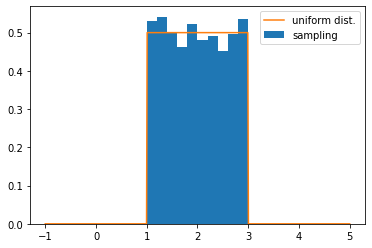

In [7]:
# Define our parameters
# Note: assumes a < b
a = 1
b = 3
num = 1000

# Draw our samples
x = np.random.uniform(a,b,num)

# Plot a histogram
plt.hist(x,bins=10,density=True,label='sampling')

# Now let's compare to our uniform distribution PDF
x = np.linspace(a-2,b+2,num=500)

# Calculate the PDF

# First initialize y as an array of zeros of the same size as x
y = np.zeros_like(x)

# Next compute nonzero values using a for loop
for i in range(len(x)):
    
    if (x[i] >= a) and (x[i] <= b):
        y[i] = 1/(b-a)

plt.plot(x,y,label='uniform dist.')

plt.legend()
plt.show()

It is worthwhile mentioning another built-in function `numpy.random.rand()` that returns samples from a uniform distribution between $0$ and $1$. The syntax is

```py
x = np.random.rand(num)
```

to return `num` samples. It does the same thing as `numpy.random.uniform(0,1,num)` but is slightly simpler to write out.

### <font color=#46769B>Example 5: Bike ride revisited</font>

Let's return to the simple sampling problem from Example 4. Let's discuss the meaning of what we are doing in terms of PDFs.

We said that the wind speed $x$ was governed by a uniform distribution $P(x)$. To be explicit, this is

$$P(x) = \left\{ \begin{array}{cc} \frac{1}{20} & {\rm for} \; -10 \le x \le 10 \\ 0 & {\rm otherwise} \end{array} \right. \, .$$

using the fact that $a=-10$ and $b=+10$. The mean wind speed is

$$\mu = \overline{x} = \int_{-\infty}^{+\infty} dx \; x \; P(x) = \frac{1}{20} \int_{-10}^{+10} x  = 0 \, ,$$

as expected. However, what we are interested in is the mean of bike ride time $t(x)$. This is calculated using the PDF

$$\overline{t(x)} = \int_{-\infty}^{+\infty} dx \; t(x) \; P(x) = \frac{1}{20} \int_{-10}^{+10} dx \; \frac{1000}{8 - 0.5 x} \; .$$

In words, we are using the PDF to average $t(x)$ over all possible wind speeds $x$, with each $x$ value given the appropriate probability $P(x)$. (In this case, all $x$ values have the same probability.) 

*A word of caution:* the mean of a function, in this case $\overline{t(x)}$, is *not* the same as taking the function evaluated at the mean, $t(\bar{x})$. In this case, $\bar{x} = 0$ and $t(0) = 125\; {\rm s}$ is the wrong answer.

Finally, let's compare our results from Example 4. The above integral can be performed analytically to get $\overline{t(x)} = 146.634 \; {\rm s}$. This is the *true answer*, while our sampling result in Example 4 was only the *approximate* answer, which in turns becomes a better and better approximation as $N$ is increased.

Let's also look at the distribution of our samples for $t(x)$ using a histogram. The following code does the following:
- Generates samples for $x$, sampling from a uniform distribution as usual.
- Generates samples for $t$ using our $x$ samples. That is, for each $x_i$, we calculate the corresponding $t$ value $t_i = t(x_i)$.
- Makes a histogram of our $t$ samples.

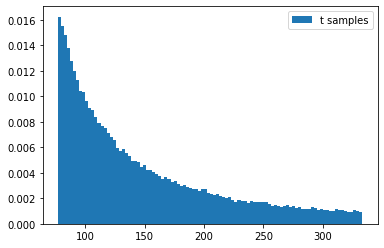

In [13]:
num = 100000 # N

# Samples for x and t
x = np.random.uniform(-10,10,num)
t = 1000/(8 - 0.5*x)

# Histogram
plt.hist(t,density=True,bins=100,label='t samples')
plt.legend()
plt.show()

When we plot a histogram in terms of $t$, what function is being plotted here? Can we understand analytically what this corresponds to?

The answer is that histogram corresponds simply to the PDF for $t$, denoted $P_t(t)$. Let's calculate this analytically (using the chain rule) and compare to our histogram.

Given $t(x) = 1000/(8-0.5 x)$, we can solve for $x$ in terms of $t$:

$$x(t) = 16 - \frac{2000}{t} \, .$$

Then $P_t(t)$ is

$$P_t(t) = \frac{1}{20} \times \frac{dx}{dt} = \frac{100}{t^2}$$

in the region where $-10 \le x \le +10$, or $1000/13 \le t \le 1000/3$, and zero otherwise.

Let's make the histogram again and compare to $P_t(t)$.

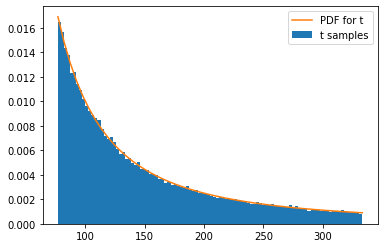

In [15]:
num = 100000 # N

# Samples for x
x = np.random.uniform(-10,10,num)
t = 1000/(8 - 0.5*x)

# Histogram
plt.hist(t,density=True,bins=100,label='t samples')

# Compare to PDF Pt
t = np.linspace(1000/13,1000/3)
plt.plot(t,100/t**2,label='PDF for t')

plt.legend()
plt.show()

## <font color=#46769B>Summary</font>

Monte Carlo sampling is a computational tool that allows us to approximate quantities (e.g., means) where there is an element of randomness or probability involved. Given the PDF $P(x)$, we can in principle calculate any quantity we want be performing a sum (if $x$ is a discrete variable) or an integral (if $x$ in continuous) to calculate any true mean. On the other hand, Monte Carlo sampling lets us make an approximation for any true mean, which improves for large $N$. 

For complex problems, calculating a true mean analytically may turn out to be very complex. On the other hand, Monte Carlo sampling can turn out to be a much more tractable approach, provided we have enough computational resources to take $N$ to be large.

To decide how large $N$ needs to be, we look at the *standard error on the mean* for whatever quantity we are computing. Once the error falls below our desired accuracy, we can declare victory.

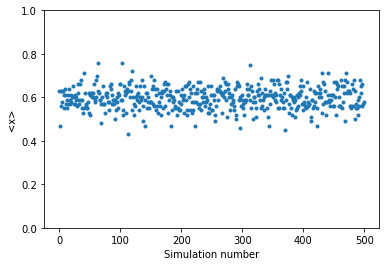

In [46]:
# Define a function that will flip a coin N times and calculate the mean <x>
def coin_flip_simulation(num):
    
    # Define parameters
    p = 0.6
    options = [1,0]
    prob = [p,1-p]
    
    # Generate samples
    x = np.random.choice(options,num,p=prob)
    
    # Calculate <x>
    mean = np.mean(x)
    
    return mean

# Let's perform 500 simulations, each with N=100
# Try changing N to see how the scatter in the mean changes
num = 100

list_of_means = []
for i in range(500):
    list_of_means.append(coin_flip_simulation(num))
    
plt.plot(list_of_means,'.')

plt.xlabel('Simulation number')
plt.ylabel('<x>')
plt.ylim([0,1])
plt.show()